## Observations and Insights 

In [226]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
#study_results.shape
# Combine the data into a single dataset

# Transaction table study_results.head()
# Metadata table mouse_metadata.head()

csv = pd.merge(study_results,mouse_metadata, on="Mouse ID")
csv.rename(columns = {'Mouse ID':'Mouse_ID','Drug Regimen':'Drug_Regimen'}, inplace = True)
# Display the data table for preview
csv.head(2)
#csv.shape

,Mouse_ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug_Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22


In [227]:
# Checking the number of mice.

Mice_Total = csv["Mouse_ID"].nunique()
Mice_Total

249

In [228]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
csv['dups'] = csv.duplicated(keep=False,subset=['Mouse_ID','Timepoint'])
csv_filter = csv[csv.dups == True]
Mouse_ID = csv_filter['Mouse_ID'].iloc[0]
Mouse_ID

'g989'

In [229]:
# Optional: Get all the data for the duplicate mouse ID. 

#csv[csv.Mouse_ID == Mouse_ID]
csv[csv.Mouse_ID == 'a203']

,Mouse_ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug_Regimen,Sex,Age_months,Weight (g),dups
898,a203,0,45.000000,0,Infubinol,Female,20,23,False
899,a203,5,48.508468,0,Infubinol,Female,20,23,False
900,a203,10,51.852437,1,Infubinol,Female,20,23,False
901,a203,15,52.777870,1,Infubinol,Female,20,23,False
902,a203,20,55.173336,1,Infubinol,Female,20,23,False
903,a203,25,56.793208,1,Infubinol,Female,20,23,False
904,a203,30,59.523197,1,Infubinol,Female,20,23,False
905,a203,35,61.931650,2,Infubinol,Female,20,23,False
906,a203,40,63.593490,2,Infubinol,Female,20,23,False
907,a203,45,67.973419,2,Infubinol,Female,20,23,False


In [230]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
print(csv.shape)
clean_csv = csv[csv.Mouse_ID != Mouse_ID]
print(clean_csv.shape)
clean_csv.head()

(1893, 9)
(1880, 9)


,Mouse_ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug_Regimen,Sex,Age_months,Weight (g),dups
0,b128,0,45.000000,0,Capomulin,Female,9,22,False
1,b128,5,45.651331,0,Capomulin,Female,9,22,False
2,b128,10,43.270852,0,Capomulin,Female,9,22,False
3,b128,15,43.784893,0,Capomulin,Female,9,22,False
4,b128,20,42.731552,0,Capomulin,Female,9,22,False


In [231]:
# Checking the number of mice in the clean DataFrame.
Mice_Total = clean_csv["Mouse_ID"].nunique()

Mice_Total

248

## Summary Statistics

In [232]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

clean_csv.groupby('Drug_Regimen').agg(Mean_Tumor_Size=('Tumor Volume (mm3)','mean'),  Median_Tumor_Size=('Tumor Volume (mm3)','median'), Var_Tumor_Size=('Tumor Volume (mm3)','var'),std_Tumor_Size=('Tumor Volume (mm3)','std'),sem_Tumor_Size=('Tumor Volume (mm3)','sem'),)

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



,Mean_Tumor_Size,Median_Tumor_Size,Var_Tumor_Size,std_Tumor_Size,sem_Tumor_Size
Drug_Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [233]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


clean_csv.groupby('Drug_Regimen').agg( Mean_Tumor_Size=('Tumor Volume (mm3)','mean'),  Median_Tumor_Size=('Tumor Volume (mm3)','median'), Var_Tumor_Size=('Tumor Volume (mm3)','var'),std_Tumor_Size=('Tumor Volume (mm3)','std'),sem_Tumor_Size=('Tumor Volume (mm3)','sem'),)



,Mean_Tumor_Size,Median_Tumor_Size,Var_Tumor_Size,std_Tumor_Size,sem_Tumor_Size
Drug_Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:xlabel='Drug_Regimen', ylabel='Timepoint'>

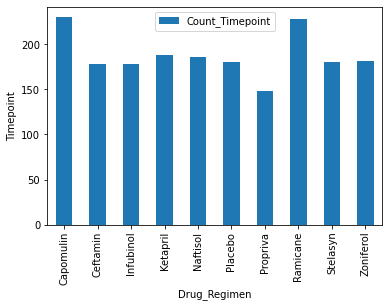

In [234]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
Panda_Bar_plot_data = clean_csv.groupby(['Drug_Regimen']).agg(Count_Timepoint=('Timepoint','count'))
#Bar_plot_data
Panda_Bar_plot_chart = Panda_Bar_plot_data.plot(kind='bar')
Panda_Bar_plot_chart.set_ylabel('Timepoint')
Panda_Bar_plot_chart

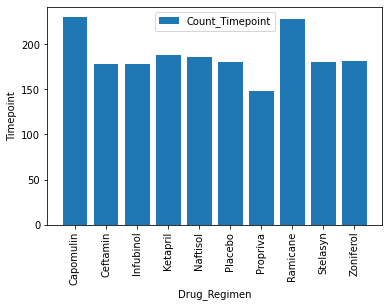

In [235]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
pyplot_Bar_Plot_Data = clean_csv.groupby(['Drug_Regimen']).agg(Count_Timepoint=('Timepoint','count'))
pyplot_Bar_Plot_Data.index
plt.bar(pyplot_Bar_Plot_Data.index,pyplot_Bar_Plot_Data['Count_Timepoint'])
plt.xticks(rotation=90)
plt.ylabel('Timepoint')
plt.xlabel('Drug_Regimen')
plt.legend(['Count_Timepoint'],loc='upper center');


<AxesSubplot:ylabel='SexCount'>

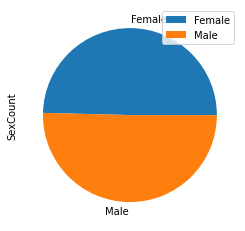

In [236]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
PandaPieChart_Data = clean_csv.groupby(['Sex']).agg(SexCount=('Mouse_ID','nunique'))
#PandaPieChart_Data.head()
PandaPieChart = PandaPieChart_Data.plot(kind='pie',y='SexCount')
PandaPieChart

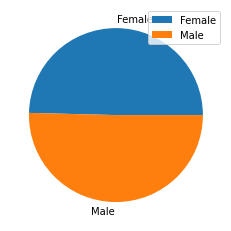

In [237]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
PyplotPieChart_Data = clean_csv.groupby(['Sex']).agg(SexCount=('Mouse_ID','nunique'))
#PyplotPieChart_Data.index
PyplotPieChart = plt.pie(PyplotPieChart_Data.SexCount,labels = PyplotPieChart_Data.index)
plt.legend(['Female','Male']);



## Quartiles, Outliers and Boxplots

In [238]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

final_tumor_Volumes = clean_csv.groupby(['Drug_Regimen','Mouse_ID']).agg(Max_Time=('Timepoint','max'),Last_Tumor_Size=('Tumor Volume (mm3)','last'))
#final_tumor_Volumes['Tumor_Size'] = clean_csv[]
final_tumor_Volumes = final_tumor_Volumes.reset_index()
final_tumor_Volumes
# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

#i made a choice not to do this because the data is already sorted doing a data join when you can pull it from the .agg is unnessicary and computationally expensive


,Drug_Regimen,Mouse_ID,Max_Time,Last_Tumor_Size
0,Capomulin,b128,45,38.982878
1,Capomulin,b742,45,38.939633
2,Capomulin,f966,20,30.485985
3,Capomulin,g288,45,37.074024
4,Capomulin,g316,45,40.159220
...,...,...,...,...
243,Zoniferol,q633,45,70.827796
244,Zoniferol,s337,45,62.109651
245,Zoniferol,w140,5,47.717952
246,Zoniferol,w575,45,68.401286


In [245]:
# Put treatments into a list for for loop (and later for plot labels) Capomulin, Ramicane, Infubinol, and Ceftamin
Treatments = ['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
#tumor_vol_data = []

for c in Treatments:

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    Filterd_Final_Tumor_Sizes = filterd_frame[filterd_frame['Drug_Regimen'] == c]
    quartiles = Filterd_Final_Tumor_Sizes['Last_Tumor_Size'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq     
    print(f"The Value were are now calucalating is: {c}")
    print(f"The lower quartile of final_tumor_Volumes is: {lowerq}")
    print(f"The upper quartile of final_tumor_Volumes is: {upperq}")
    print(f"The interquartile range of final_tumor_Volumes is: {iqr}")
    print(f"The the median of final_tumor_Volumes is: {quartiles[0.5]} ")
    print("")
    

The Value were are now calucalating is: Capomulin
The lower quartile of final_tumor_Volumes is: 32.37735684
The upper quartile of final_tumor_Volumes is: 40.1592203
The interquartile range of final_tumor_Volumes is: 7.781863460000004
The the median of final_tumor_Volumes is: 38.125164399999996 

The Value were are now calucalating is: Ramicane
The lower quartile of final_tumor_Volumes is: 31.56046955
The upper quartile of final_tumor_Volumes is: 40.65900627
The interquartile range of final_tumor_Volumes is: 9.098536719999998
The the median of final_tumor_Volumes is: 36.56165229 

The Value were are now calucalating is: Infubinol
The lower quartile of final_tumor_Volumes is: 54.04860769
The upper quartile of final_tumor_Volumes is: 65.52574285
The interquartile range of final_tumor_Volumes is: 11.477135160000003
The the median of final_tumor_Volumes is: 60.16518046 

The Value were are now calucalating is: Ceftamin
The lower quartile of final_tumor_Volumes is: 48.72207785
The upper quar

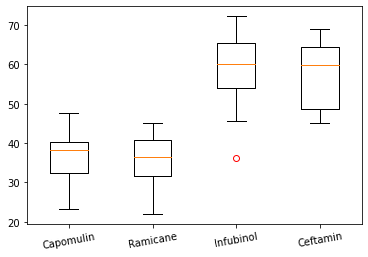

In [254]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
filterd_frame = final_tumor_Volumes 
#filterd_frame
Capomulin = filterd_frame[filterd_frame['Drug_Regimen'] == 'Capomulin'].Last_Tumor_Size
Ramicane = filterd_frame[filterd_frame['Drug_Regimen'] == 'Ramicane'].Last_Tumor_Size
Infubinol = filterd_frame[filterd_frame['Drug_Regimen'] == 'Infubinol'].Last_Tumor_Size
Ceftamin = filterd_frame[filterd_frame['Drug_Regimen'] == 'Ceftamin'].Last_Tumor_Size
Columns = [Capomulin,Ramicane,Infubinol,Ceftamin]
fig, ax = plt.subplots()
ax.boxplot(Columns,flierprops=dict(color='r', markeredgecolor='r'))
plt.xticks([1, 2, 3, 4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"], rotation=10)
plt.show()


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
